In [1]:
pth = 'C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/' 
folder = 'raw data/'
figs_folder = 'Figs/'

In [5]:
import datetime
from time import process_time
import importlib
import h5py
import csv
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel,ConstantModel#GaussianModel,LorentzianModel

# from scipy.signal import find_peaks
# from scipy.signal import peak_widths
# from scipy.signal import savgol_filter
# from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                AutoMinorLocator)
# import matplotlib.dates as mdates

import basics_forGithub as ba
import MakeFigure3_forGithub as mf3



todaydate = datetime.datetime(2023,8,26)
todaydate_str = todaydate.strftime("%Y-%m-%d")
print('today: '+todaydate_str)

today: 2023-08-26


In [6]:
colormap  = 'gist_rainbow'

plt.rcParams["font.family"] = 'Calibri'
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({
    "text.usetex": False,
})

cm = 1/2.54  # centimeters in inches

In [7]:
# in length order
sample_list_for_fig = ['ABT-Br-F','NPT','MBN','BPT','Br-BPT','NC-BPT','TPT']
colors = ['#ce62f4ff','#f59b07ff','#ff0047ff','#000080ff','#bdd52dff','#288c6eff','#4575f0ff']
colors_dict = dict(zip(sample_list_for_fig,colors))
colors_dict['BPT picocavity'] = 'm'

# label_num = ['(1)','(2)','(3)','(4)','(5)','(6)','(7)','(8)']
label_num = ['(7)','(6)','(5)','(4)','(3)','(2)','(1)']
label_num_dict = dict(zip(sample_list_for_fig,label_num))
label_num_dict

{'ABT-Br-F': '(7)',
 'NPT': '(6)',
 'MBN': '(5)',
 'BPT': '(4)',
 'Br-BPT': '(3)',
 'NC-BPT': '(2)',
 'TPT': '(1)'}

In [53]:
colors_dict_new = {}
for sample in ['BPT']: #colors_dict.keys():
    color_hex = colors_dict[sample]
#     rgba_dict[sample] = clrs.to_rgba(color_hex,alpha=1.)
    lighter = [c * 1.6 for c in list(clrs.to_rgba(color_hex,alpha=1.))[:-1]] 
    lighter.append(1.)
    colors_dict_new[sample] = tuple(lighter)

colors_dict_new['BPT']

rgba_dict = {}
for sample in colors_dict.keys():
    color_hex = colors_dict[sample]
#     rgba_dict[sample] = clrs.to_rgba(color_hex,alpha=1.)
#     darker = [c * 0.6 for c in list(clrs.to_rgba(color_hex,alpha=1.))[:-1]] 
    darker = [c * 0.75 for c in list(clrs.to_rgba(color_hex,alpha=1.))[:-1]] 
    darker.append(1.)
    rgba_dict[sample] = tuple(darker)

rgba_dict['BPT']

(0.0, 0.0, 0.3764705882352941, 1.0)

In [8]:
#    colorsforfig_rgba = [clrs.to_rgba(hx,alpha=0.5) for hx in colorsforfig]
import matplotlib.colors as clrs

rgba_dict = {}
for sample in colors_dict.keys():
    color_hex = colors_dict[sample]
    darker = [c * 0.2 for c in list(clrs.to_rgba(color_hex,alpha=1.))[:-1]] 
    darker.append(1.)
    rgba_dict[sample] = tuple(darker)

In [9]:
csvsubfolder = 'CSVs/'
csvpth = pth + csvsubfolder

In [12]:
files = ba.FindCSVs(pth,csvsubfolder)
files

theres a directory in this subfolder?


['ABT-Br-F_Fig2.csv',
 'ABT-Br-F_Fig3.csv',
 'BPT_Fig2.csv',
 'BPT_Fig3.csv',
 'BPT_picocavity_Fig3.csv',
 'Br-BPT_Fig2.csv',
 'Br-BPT_Fig3.csv',
 'MBN_Fig2.csv',
 'MBN_Fig3.csv',
 'NC-BPT_Fig2.csv',
 'NC-BPT_Fig3.csv',
 'NPT_Fig2.csv',
 'NPT_Fig3.csv',
 'TPT_Fig2.csv',
 'TPT_Fig3.csv']

BPT_picocavity_Fig3.csv


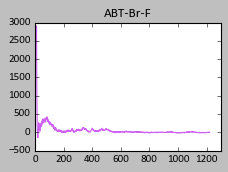

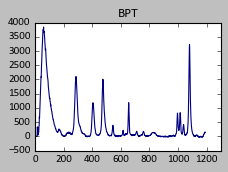

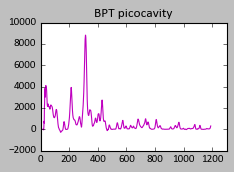

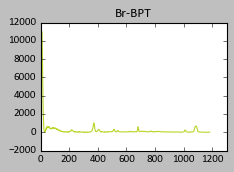

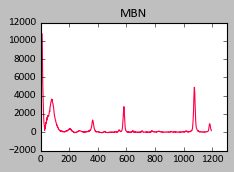

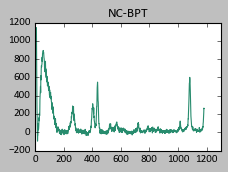

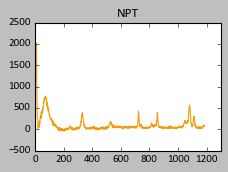

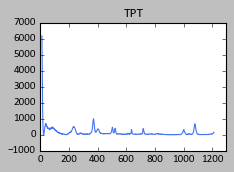

In [14]:

measurements_dict = {}
for file in files:
    if 'picocavity' in file:
        sample = 'BPT picocavity'
    else:
        sample = file.split('.')[0].split('_')[0]
    csvfilename = csvpth+file
    if 'Fig3' in csvfilename:
        if 'picocavity' in file:
            print(file)
        X,Y = ba.LoadCSV(csvfilename,heading=False)
        mask = np.abs(X) < 10.
        X_2 = X[~mask]
        Y_2 = Y[~mask]
        measurements_dict[sample] = (X_2,Y_2)
        fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(3,2))
        ax.plot(X_2,Y_2,color=colors_dict[sample])
        ax.set(title=sample,xlim=[0,1300])

In [15]:
plt.close('all')

In [16]:
samples = list(measurements_dict.keys())
samples

['ABT-Br-F', 'BPT', 'BPT picocavity', 'Br-BPT', 'MBN', 'NC-BPT', 'NPT', 'TPT']

In [25]:
DFTsubfolder = 'CSVs/DFT/single molecule/'

# for sample in ['ABT-Br-F', 'BPT', 'Br-BPT', 'MBN', 'NC-BPT', 'NPT', 'TPT']: #samples:
DFTfiles = ba.FindCSVs(pth,DFTsubfolder)
print(DFTfiles)

['abt-br-f_nanocavitygap08A_dsigmalines.csv', 'bpt_nanocavitygap10A_dsigmalines.csv', 'br-bpt_nanocavitygap14A_dsigmalines.csv', 'mbn_nanocavitygap08A_dsigmalines.csv', 'nc-bpt_nanocavitygap12A_dsigmalines.csv', 'npt_nanocavitygap08A_dsigmalines.csv', 'tpt_nanocavitygap12A_dsigmalines.csv']


BPT bpt_nanocavitygap10A_dsigmalines.csv
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/comparing dft and measured spectrum of BPT.png


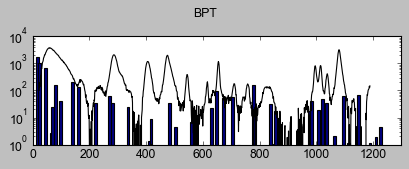

Br-BPT br-bpt_nanocavitygap14A_dsigmalines.csv
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/comparing dft and measured spectrum of Br-BPT.png


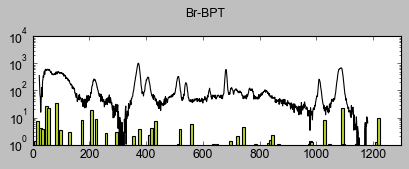

MBN mbn_nanocavitygap08A_dsigmalines.csv
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/comparing dft and measured spectrum of MBN.png


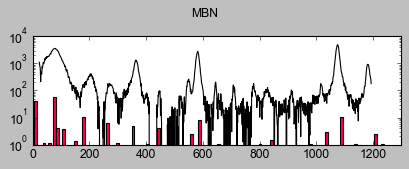

NC-BPT nc-bpt_nanocavitygap12A_dsigmalines.csv
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/comparing dft and measured spectrum of NC-BPT.png


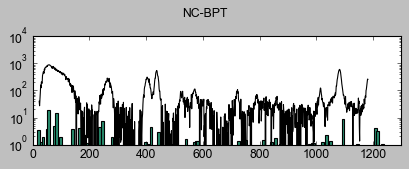

NPT npt_nanocavitygap08A_dsigmalines.csv
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/comparing dft and measured spectrum of NPT.png


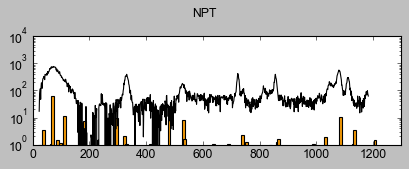

TPT tpt_nanocavitygap12A_dsigmalines.csv
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/comparing dft and measured spectrum of TPT.png


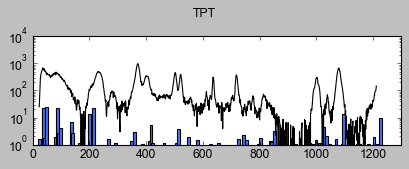

ABT-Br-F abt-br-f_nanocavitygap08A_dsigmalines.csv
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/comparing dft and measured spectrum of ABT-Br-F.png


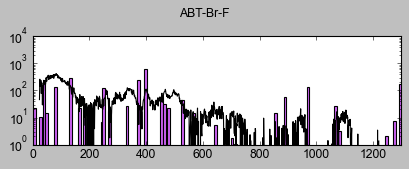

In [57]:
DFT_dict = {}
for sample in ['BPT', 'Br-BPT', 'MBN', 'NC-BPT', 'NPT', 'TPT','ABT-Br-F']: 
    meas_X_unmasked,meas_Y_unmasked = measurements_dict[sample]
    mask = np.abs(meas_X_unmasked) < 23.
    meas_X = np.ma.masked_array(meas_X_unmasked,mask=mask)
    meas_Y = np.ma.masked_array(meas_Y_unmasked,mask=mask)
    offset = 1.#0.
    offsetincrement = 0.#1.

    for DFTfile in DFTfiles:
        if sample.lower() == DFTfile.split('_')[0]:
            break
    csvfilename = pth + DFTsubfolder + DFTfile
    X,Y = ba.LoadCSV(csvfilename,heading=True)
    Y_scaled = Y * 10**29
    DFT_dict[sample] = (X,Y)
    print(sample,DFTfile)
    
    colors = ba.CreateColorsList(5,colormap='plasma')[1:]
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,2),sharex=True,constrained_layout=True)
    fig.suptitle(sample)
    ax.bar(X,Y_scaled,bottom=offset,width=10,color=colors_dict[sample])

    ax.plot(meas_X,meas_Y+offset,color='k')
#             offset += offsetincrement
#             c+=1
    ax.set(xlim=[0,1300],ylim=[10**0,10**4],yscale='log')
#         ax.legend(loc='best')

    Title = 'comparing dft and measured spectrum of '+sample
    figname = pth + Title + '.png'#pth+folder+Title+'.png'
    ba.ensure_dir(figname)
    print(figname)
#     fig.savefig(figname,format='png',bbox_inches='tight',transparent=False)
    plt.show()


In [58]:
# Get constant scaling factor for eaach molecule 
                 # by finding peaks in region btwn 1000 and 1200 of meas and dft spectra
                 # and scaling to bring them together: (meas/dft) * dft

# looking closely at matchup of dft and meas to select scaling

scaling_dict = {}

peak_region = [1000,1125]

for sample in sample_list_for_fig: 
    WN,Ynewnewnew = measurements_dict[sample]
    ai = ba.FindIndexX(peak_region[0],WN)
    bi = ba.FindIndexX(peak_region[1],WN)
    print('\n',sample)
    meas_mx_x = WN[ai:bi][np.argmax(Ynewnewnew[ai:bi])]
    print('meas mx at',meas_mx_x)

    for DFTfile in DFTfiles:
        if sample.lower() == file.split('_')[0]:
            break
    csvfilename = pth + DFTsubfolder + DFTfile
    X,Y = ba.LoadCSV(csvfilename,heading=True)
    

    ai = ba.FindIndexX_old(peak_region[0],X)
    bi = ba.FindIndexX_old(peak_region[1],X)
    dft_mx_x = X[ai:bi][np.argmax(Y[ai:bi])]
    print('dft mx at',dft_mx_x)
    scale = (meas_mx_x / dft_mx_x)
    print(scale)

    scaling_dict[sample] = scale


 ABT-Br-F
meas mx at 1103.3347919265436
dft mx at 1095.9
1.0067841882713235

 NPT
meas mx at 1079.907841067498
dft mx at 1095.9
0.9854072826603687

 MBN
meas mx at 1074.3979639637366
dft mx at 1095.9
0.9803795637957263

 BPT
meas mx at 1080.175183505178
dft mx at 1095.9
0.985651230500208

 Br-BPT
meas mx at 1087.9537125830668
dft mx at 1095.9
0.9927490761776319

 NC-BPT
meas mx at 1081.439261
dft mx at 1095.9
0.9868046911214526

 TPT
meas mx at 1079.5527162441101
dft mx at 1095.9
0.9850832340944521


In [59]:
scaling_dict['BPT']

0.985651230500208

In [60]:
def ConvertAxisInvcm2AxisTHz(axInvCm):
    x1, x2 = axInvCm.get_xlim()
    #print(x1,x2)
    axTHz.set_xlim(mf3.wavenumber2frequency(x1), mf3.wavenumber2frequency(x2))
    axTHz.figure.canvas.draw() 

25.0 cm-1, 0.749481145 THz
199.0 cm-1, 5.9658699142 THz
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figure 3/Figure 3 in spectral region 25-199 cm$^{-1}$, offset.svg
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figure 3/Figure 3 in spectral region 25-199 cm$^{-1}$, offset.png
200.0 cm-1, 5.99584916 THz
1150.0 cm-1, 34.47613267 THz
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figure 3/Figure 3 in spectral region 200-1150 cm$^{-1}$, offset.svg
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figure 3/Figure 3 in spectral region 200-1150 cm$^{-1}$, offset.png


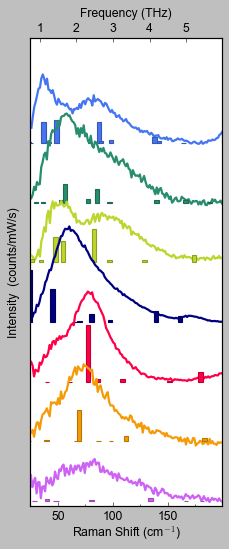

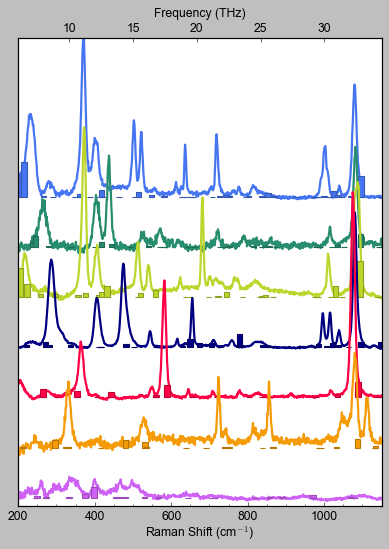

In [61]:
# Plot together offset 


regions = [[25,199],[200,1150]]
r = 0
for S_view_region in regions:
#     Title = 'variations of BPT in spectral region '+str(S_view_region[0])+'-'+str(S_view_region[1])+' cm$^{-1}$' + ', offset'#+ 'with DFT, log'
    Title = 'Figure 3 in spectral region '+str(S_view_region[0])+'-'+str(S_view_region[1])+' cm$^{-1}$' + ', offset'#+ 'with DFT, log'
    if r == 0:
        figsize = (3,7)#(4,7)#(13,7)
        major = 50
        minor = 25
        THzmajor = 1
        ylim = [0,4.7*10**3] #1*10**4]
        offsetincrement = 600 #10**3
        barwidth = 4
    else:
        figsize=(5,7)
        major = 200
        minor = 50
        THzmajor = 5
        ylim = [0,2800]
        offsetincrement = 300
        barwidth = 14
    region = [55,200]
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=figsize)#,sharey=True)
    #fig.suptitle(Title, fontsize=12)
    axTHz = ax.twiny()
    ax.callbacks.connect("xlim_changed", ConvertAxisInvcm2AxisTHz)

    z = len(sample_list_for_fig)
    offset=50
    for sample in sample_list_for_fig: #ERS_dict.keys():
        WN,Ynewnewnew = measurements_dict[sample]
        mask = np.abs(WN) < 25.
        Y_mskd = np.ma.masked_array(Ynewnewnew,mask=mask)

        if sample in ['BPT','MBN']:
            Y_mskd = Y_mskd / 4. #6.
            suffix = u'÷'+'4'#' /6'
        else:
            suffix = ''
        label = label_num_dict[sample] + ' ' + sample
        ax.plot(WN,Y_mskd+offset,color=colors_dict[sample],label=label+suffix,lw=2,zorder=z)
        
        # |   |   |   |   <DFT>   |   |   |   |  
        X,Y = DFT_dict[sample]
        if sample in ['BPT']:
            Y_scaled = Y * 5*10**28
            suffix = ' '
        elif sample in ['ABT-Br-F']:
            Y_scaled = Y * 1*10**28
            suffix = ' '
        elif sample in ['NPT']:
            Y_scaled = Y * 5*10**29
            suffix = ' '
        else:
            Y_scaled = Y * 10**30
            suffix = ''
        ax.bar(X,Y_scaled,bottom=offset,width=barwidth,
               color=colors_dict[sample],edgecolor=rgba_dict[sample],zorder=z)#label=gapsize,
        z-=1
        offset+=offsetincrement
        # |   |   |   |   </DFT>   |   |   |   |   

    if r == 0:
        ylabel = 'Intensity  (counts/mW/s)' #(arb)'#
#         xlabel = None
        xlabel = 'Raman Shift (cm$^{-1}$)'
        axTHz.set_xlabel('Frequency (THz)')
        vis = True
    else:
        ylabel = None
        xlabel = 'Raman Shift (cm$^{-1}$)'
        axTHz.set_xlabel('Frequency (THz)')
        vis = False
        
    ax.set(#title=Title,
            ylabel = ylabel,
            xlabel = xlabel,
           xlim=S_view_region,ylim=ylim)    
    #ax.set_ylim(bottom=-500)
    
    ax.xaxis.labelpad = 0.5
    axTHz.xaxis.labelpad = 5
    
    ax.get_yaxis().set_visible(vis)
#     ax.set_yticks([10**4,2*10**4,3*10**4,4*10**4,5*10**4])#,6*10**4,])
    ax.set_yticks([1,2,3])
    ax.set_yticklabels([None,None,None])#,None])
    ax.yaxis.set_ticks_position('left')

    
#     # // legend
#     if r == 0:
#         handles, labels = ax.get_legend_handles_labels()
#                                                     #loc=[0.40,0.02]
#         # reverse the order                              0.6 # if r == 1, then loc=[0.30,0.03],labelspacing=3.1,
#         leg = ax.legend(handles[::-1], labels[::-1],loc=[0.48,0.04],fontsize=13,ncol=1,
#                         labelspacing=2.5,labelcolor='linecolor', #2.5
#                         framealpha=0.,frameon=False, #3)
#     #               markerscale=0.5,markerfirst=False,handletextpad=0.1
#                         handlelength=0, handletextpad=0,
#                         ) 
#         for item in leg.legendHandles:
#             item.set_visible(False)
#     # //f
#     if r == 1:
#         handles, labels = ax.get_legend_handles_labels()
#         ax.legend(handles[::-1], labels[::-1],loc='best',fontsize=7)

    ax.xaxis.set_major_locator(MultipleLocator(major))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(minor))
    # axes[1].xaxis.set_minor_formatter(FormatStrFormatter('%d'))
    #ax.grid(b=True, which='both', axis='x', color='gainsboro', linestyle='-')
    axTHz.xaxis.set_major_locator(MultipleLocator(THzmajor))
    plt.tight_layout()
    r += 1   

    figname = pth+folder+'Figure 3/'+Title+'.svg'
    ba.ensure_dir(figname)
    print(figname)
#     fig.savefig(figname,format='svg',bbox_inches='tight',transparent=True)
    
    figname = pth+folder+'Figure 3/'+Title+'.png'
    ba.ensure_dir(figname)
    print(figname)
#     fig.savefig(figname,format='png',bbox_inches='tight',transparent=False)





In [62]:
# rgba_dict = {}
# for sample in colors_dict.keys():
#     color_hex = colors_dict[sample]
# #     rgba_dict[sample] = clrs.to_rgba(color_hex,alpha=1.)
#     darker = [c * 0.1 for c in list(clrs.to_rgba(color_hex,alpha=1.))] 
#     rgba_dict[sample] = tuple(darker)


# plt.rcParams["font.family"] = 'Arial'#'Calibri'
# plt.rcParams.update({'font.size': 11})

In [45]:
from lmfit.models import LinearModel, GaussianModel

# def EvalMultiGaussFromDFT(DFTfullname,eval_dict,mol,threshold):
def EvalMultiGaussFromDFT(X,Y,eval_dict,mol,threshold):
    eval_dict[mol] = {}
    
#     #DFTfullname = DFT_dict[mol]['DFTfullname']  #DFTp + DFT_p_dict[mol]
#     Xfull,Yfull = LoadCSV(DFTfullname,heading=True)
#     left = 5
#     right = 150
#     bi = FindIndexX(left,Xfull)
#     ci = FindIndexX(right,Xfull)
#     X = Xfull[bi:ci] #THzWN
#     # * offset wavenumber positions  ? 

#     Y = Yfull[bi:ci] #THzY
#     # num_peaks = DFT_dict[mol]['num peaks']
#     # peaks = DFT_dict[mol]['peaks']



#     for sigma in [1,7,13]:
    for sigma in [2,12,13]: #2,28
        key = str(sigma)
        
        model = LinearModel()#prefix='line_')
        pars = model.make_params(slope=0.0, intercept=0.0)
        pars['slope'].set(vary=False)
        pars['intercept'].set(vary=False)
        
        # for n in range(1,num_peaks+1):
        for i in range(len(X)):

            if Y[i] > threshold:

                prefix = 'f' + str(i+1) + '_'

                center = X[i] #         * shift?
                amplitude = Y[i]
                #sigma = 50 #            * arbitrary? iterate andd show three different sigmas?

                peak = GaussianModel(prefix=prefix)
                pars.update(peak.make_params(center=center, sigma=sigma, amplitude=amplitude))

                model = model + peak

        
        Xeval = np.linspace(0,200,201)
        Yeval = model.eval(pars,x=Xeval)
        eval_dict[mol][key] = (Xeval,Yeval)
    
    return eval_dict

25.0 cm-1, 0.749481145 THz
201.0 cm-1, 6.0258284058 THz
C:/Users/alb214/OneDrive/Documents/Python Scripts/My First Paper Figures/Figure 3/Figure 3 in spectral region 25-201 cm$^{-1}$, offset.svg
C:/Users/alb214/OneDrive/Documents/Python Scripts/My First Paper Figures/Figure 3/Figure 3 in spectral region 25-201 cm$^{-1}$, offset.png
201.0 cm-1, 6.0258284058 THz
1150.0 cm-1, 34.47613267 THz
C:/Users/alb214/OneDrive/Documents/Python Scripts/My First Paper Figures/Figure 3/Figure 3 in spectral region 201-1150 cm$^{-1}$, offset.svg
C:/Users/alb214/OneDrive/Documents/Python Scripts/My First Paper Figures/Figure 3/Figure 3 in spectral region 201-1150 cm$^{-1}$, offset.png


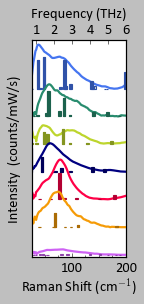

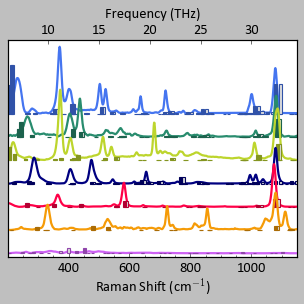

In [48]:
figs_folder

'Figs/'

25.0 cm-1, 0.749481145 THz
175.0 cm-1, 5.246368015 THz
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figure 3/Figure 3 in spectral region 25-175 cm-1, offset, 2023-08-26.png
175.0 cm-1, 5.246368015 THz
1150.0 cm-1, 34.47613267 THz
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figure 3/Figure 3 in spectral region 175-1150 cm-1, offset, 2023-08-26.png


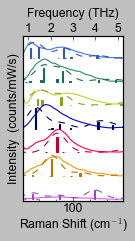

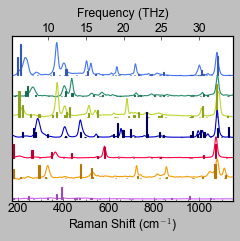

In [63]:
# THIS IS FIGURE 3 

eval_dict = {}
sigma = '13'
regions = [[25,175],[175,1150]]
r = 0
for S_view_region in regions:
    Title = 'Figure 3 in spectral region '+str(S_view_region[0])+'-'+str(S_view_region[1])+' cm-1' + ', offset'
    if r == 0:
        figsize = (4.5*cm,8*cm)#(2,4)#(3,7)#(4,7)#(13,7)
        major = 100
        minor = 25
        THzmajor = 1
        ylim = [0,6.3*10**3]#[0,5.1*10**3]#4.7*10**3] #1*10**4]
        offsetincrement = 900#650 #10**3
        barwidth = 2#4
    else:
        figsize=(8*cm,8*cm)#(4,4)#(5,7)
        major = 200
        minor = 50
        THzmajor = 5
        ylim = [0,4400]
        offsetincrement = 550
        barwidth = 5#10
    #region = [55,200]
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=figsize)#,sharey=True)
    #fig.suptitle(Title, fontsize=12)
    axTHz = ax.twiny()
    ax.callbacks.connect("xlim_changed", ConvertAxisInvcm2AxisTHz)
    

    z = len(sample_list_for_fig)
    offset=50
    for sample in sample_list_for_fig: 
        WN,Ynewnewnew = measurements_dict[sample]
        Y_filtered = ba.ReduceNoise(WN,Ynewnewnew,notchedge=5,cutoff = 5000)
        mask = np.abs(WN) < 25.
        Y_mskd = np.ma.masked_array(Y_filtered,mask=mask)
        if sample in ['BPT','ABT-Br-F']:
            Y_mskd = Y_mskd / 4. #6.
            suffix = u'÷'+'4'#' /6'
        elif sample == 'MBN':
            if r == 0:
                Y_mskd = Y_mskd / 4. #6.
                suffix = u'÷'+'4'#' /6'
            else:
                Y_mskd = Y_mskd / 8. #6.
                suffix = u'÷'+'8'#' /6'
        else:
            suffix = ''
        label = label_num_dict[sample] + ' ' + sample
        if sample == 'BPT':
            color = colors_dict_new['BPT']
        else:
            color = colors_dict[sample]
        ax.plot(WN,Y_mskd+offset,color=color,label=label+suffix,lw=1,zorder=z)

        
        # |   |   |   |   <DFT>   |   |   |   |  
        X,Y = DFT_dict[sample]
        X_scaled = np.array(X) * scaling_dict['BPT']
        if r == 0:
            X_cut = np.array([x for x in X_scaled if x >= 25])
            Y_cut = np.array([y for i,y in enumerate(Y) if X_scaled[i] >= 25])
            # GAUSSIANS
            if sample in ['BPT','ABT-Br-F']:
                Y_scaled = Y_cut * 4 * 10**30
            elif sample in ['TPT']:
                Y_scaled = Y_cut * 5* 10**31
            elif sample in ['NC-BPT']:
                Y_scaled = Y_cut * 9 * 10**31
            else:
                Y_scaled = Y_cut * 4 * 10**31
            threshold = 0. 
            eval_dict = EvalMultiGaussFromDFT(X_cut,Y_scaled,eval_dict,sample,threshold)
            gauss_x,gauss_y = eval_dict[sample][sigma]
            ax.plot(gauss_x,gauss_y+offset,color=rgba_dict[sample],lw=1,zorder=z,ls='--')
        # BAR GRAPH
            if sample in ['BPT','ABT-Br-F']:
                Y_scaled = Y * 1.2*10**29
            elif sample in ['NC-BPT']:
                Y_scaled = Y * 3*10**30
            elif sample in ['TPT']:
                Y_scaled = Y * 2*10**30
            else:
                Y_scaled = Y * 10**30
        else:
            if sample in ['BPT']:
                Y_scaled = Y * 4 * 10**29
            elif sample in ['ABT-Br-F']:
                Y_scaled = Y * 5 * 10**28
            else:
                Y_scaled = Y * 4*10**30
        ax.bar(X_scaled,Y_scaled,bottom=offset,width=barwidth,
                   color=rgba_dict[sample],edgecolor=rgba_dict[sample],zorder=z)
        z-=1
        offset+=offsetincrement
        # |   |   |   |   </DFT>   |   |   |   |   

    
    
    if r == 0:
        ylabel = 'Intensity  (counts/mW/s)' #(arb)'#
#         xlabel = None
        xlabel = 'Raman Shift (cm$^{-1}$)'
        axTHz.set_xlabel('Frequency (THz)')
        vis = True
    else:
        ylabel = None
        xlabel = 'Raman Shift (cm$^{-1}$)'
        axTHz.set_xlabel('Frequency (THz)')
        vis = False
        
    ax.set(#title=Title,
            ylabel = ylabel,
            xlabel = xlabel,
           xlim=S_view_region,ylim=ylim)    
    #ax.set_ylim(bottom=-500)
    
    ax.tick_params(axis='both', which='major', pad=2)
    axTHz.tick_params(axis='x', which='major', pad=2)
    
    ax.yaxis.labelpad = 0.1#0.5
    ax.xaxis.labelpad = 0.1#0.5
    axTHz.xaxis.labelpad = 5
    
    ax.get_yaxis().set_visible(vis)
    ax.set_yticks([1,2,3])
    ax.set_yticklabels([None,None,None])#,None])
    ax.yaxis.set_ticks_position('left')

    ax.xaxis.set_major_locator(MultipleLocator(major))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(minor))
    axTHz.xaxis.set_major_locator(MultipleLocator(THzmajor))
    plt.tight_layout()
    r += 1   

#     figname = pth+folder+'Figure 3/'+Title+'.svg'
#     ensure_dir(figname)
#     print(figname)
# #     fig.savefig(figname,format='svg',bbox_inches='tight',transparent=True)
    
    figname = pth+folder+'Figure 3/'+Title+', 2023-08-26.png'
    ba.ensure_dir(figname)
    print(figname)
#     fig.savefig(figname,format='png',bbox_inches='tight',transparent=False,dpi=300)



